## Simple Examples Explaining Dask

In [2]:
import dask
from dask import delayed
import time

import os
try:
    import graphviz
except ModuleNotFoundError:
    os.system('apt update')
    os.system('apt install -y graphviz')
    os.system('conda install -c conda-forge graphviz -y')
    os.system('conda install -c conda-forge python-graphviz -y')

### Normal Sum

a = 1+2 // each function is give a 2 sec delay to show the time difference  - 2 sec  
b = 3+4 // each function is give a 2 sec delay to show the time difference - 2 sec  
res = a+b // each function is give a 2 sec delay to show the time difference - 2 sec  

It takes a total of 6 secs here.

In [3]:
%%time

## Mormal Sum Function
## Adding 2 secs delay to for better explaining in complex scenarios
def sum(a, b):
    time.sleep(2)
    return a+b

a = sum(1,2)
b = sum(3,4)
sum(a,b)

CPU times: user 1.18 ms, sys: 2.81 ms, total: 3.99 ms
Wall time: 6.01 s


10

### Dask delayed  Sum Functions
a = 1+2 // each function is give a 2 sec delay to show the time difference - 2 sec 
b = 3+4 // each function is give a 2 sec delay to show the time difference - 2 sec
res = a+b // each function is give a 2 sec delay to show the time difference - 2 sec

It takes a total of 4 secs here. as step 1 and step 2 are done in parallel.

In [4]:
%%time

## Mormal Sum Function
## Adding 2 secs delay to for better explaining in complex scenarios
def sum(a, b):
    time.sleep(2)
    return a+b

# using delayed her in calling the function creates a dask graph here rather than executing the function
a = delayed(sum)(1,2)
b = delayed(sum)(3,4)
res = delayed(sum)(a,b)


CPU times: user 2 ms, sys: 0 ns, total: 2 ms
Wall time: 1.43 ms


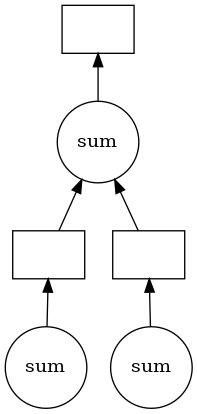

In [5]:
## visualizing the dask graph
res.visualize()

In [6]:
%%time

## Computing the dask Graph for the results, all the graph that we created will be executed here
res.compute()

CPU times: user 28 ms, sys: 58.4 ms, total: 86.4 ms
Wall time: 4.07 s


10

### Increment each value in a Array Sum

a = a+1 // each elelment in a array is give a 2 sec delay to show the time difference  - 2 sec  

It takes a total of 40 secs here.

In [7]:
%%time


## Mormal Sum Function
def inc(a):
    time.sleep(2)
    return a+1

arr = range(20)
res = [inc(x) for x in arr]
res

CPU times: user 128 ms, sys: 8.2 ms, total: 136 ms
Wall time: 40 s


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

### Increment each value in a Array Sum using Dask

a = a+1 // each elelment in a array is give a 2 sec delay to show the time difference  - 2 sec  

It takes a total of 2 secs here.  

fill in the ______ to solve the below example  

In [14]:
%%time
def inc(a):
    time.sleep(2)
    return a+1

arr = range(20)
res = [delayed(inc)(x) for x in arr]

#res = dask.compute(res)

CPU times: user 1.95 ms, sys: 5.85 ms, total: 7.8 ms
Wall time: 4.29 ms


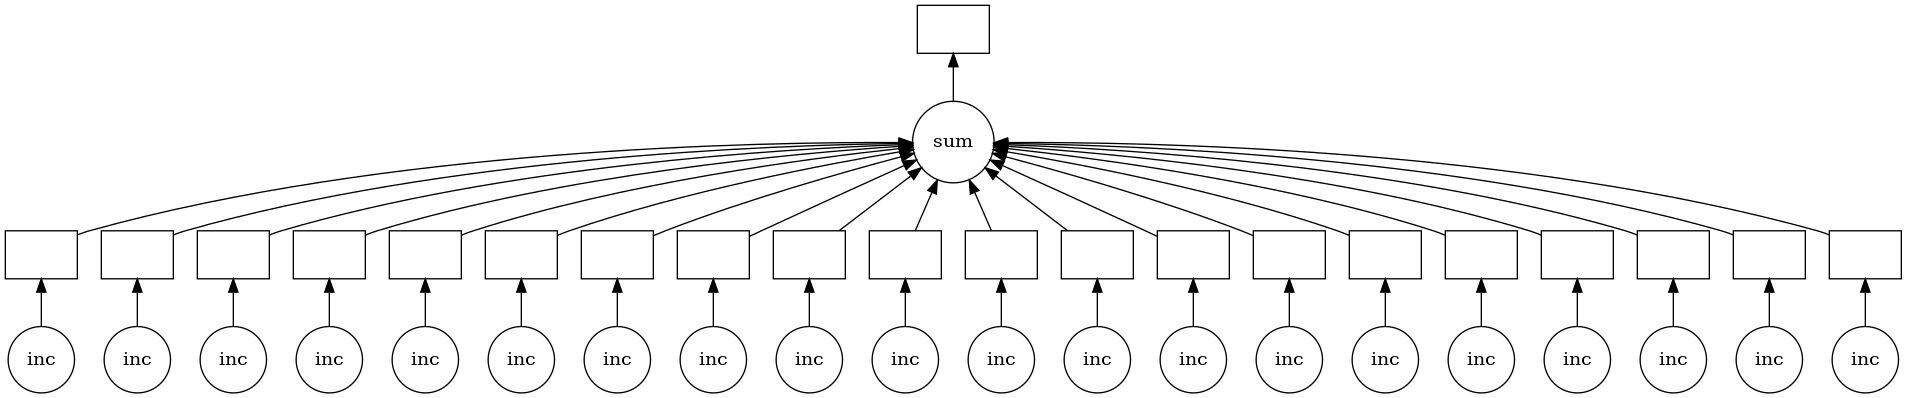

In [15]:
res= delayed(sum)(res) ## summing up all the lements in the array
res.visualize()

In [4]:
from dask.distributed import Client, LocalCluster
import dask
from dask import delayed
import time

from dask.distributed import Client

## here we are using a Local Cluster to cluster all the CPUs together since we are running all the functions on CPU
cluster = LocalCluster(dashboard_address=':8002')
c =Client(cluster)



/conda/envs/rapids/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8002 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35404 instead
  http_address["port"], self.http_server.port


In [5]:
def inc(a):
    time.sleep(10)
    return a+1

arr = range(20)
res = [delayed(inc)(x) for x in arr]
res, = dask.persist(res)

In [6]:
res

[Delayed('inc-b1ac1a5d-1125-4fb6-89e0-7beb907c3fa8'),
 Delayed('inc-69aa699d-bba9-4bc2-b662-2b89f11d8813'),
 Delayed('inc-cb17dda4-193b-4cac-8a9b-a2f7307c1241'),
 Delayed('inc-5189332b-f73c-4672-ba43-7fcd6a25a753'),
 Delayed('inc-8070da81-727a-4b20-8ef8-d1be1c6da1bd'),
 Delayed('inc-6f122b97-7789-4201-8176-22b9e8a66fb3'),
 Delayed('inc-60251e79-51ab-4dbb-94ec-d752a45568f8'),
 Delayed('inc-db8551f4-e163-4794-869b-e697ed46014d'),
 Delayed('inc-ae794c99-ac1e-4eaf-947f-9697288c1b70'),
 Delayed('inc-a5fae831-e92e-4b51-ba06-f8ee7511f88c'),
 Delayed('inc-c3f38c44-ebfd-4007-80ff-4d3bd3773f6a'),
 Delayed('inc-dc651999-caef-4755-8c94-b0accadd2a92'),
 Delayed('inc-6c38571e-e411-4447-8a27-232c6c356b7e'),
 Delayed('inc-da068915-604c-46b1-8f26-b499ea954138'),
 Delayed('inc-6c1ff4df-c0c7-48e5-a9f0-23b672fd262f'),
 Delayed('inc-8037f8ed-b3a9-48ea-8744-a4dd9ba233d6'),
 Delayed('inc-5591f748-d561-4e57-bcdb-d104a2e7ea47'),
 Delayed('inc-4c3b1c20-c048-4c20-9edd-1c8f289f27ea'),
 Delayed('inc-6dae345d-765f-